# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
# Import supplementary visualizations code visuals.py
import visuals as vs

np.random.seed(0)

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    data.columns = data.columns.str.lower()
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

fresh          milk       grocery        frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       detergents_paper  delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [181, 71, 171]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


fresh   milk  grocery  frozen  detergents_paper  delicatessen
0  112151  29627    18148   16745              4948          8550
1   18291   1266    21042    5373              4173         14472
2     200  25862    19816     651              8773          6250

In [4]:
samples - data.median()

fresh     milk  grocery   frozen  detergents_paper  delicatessen
0  103647.0  26000.0  13392.5  15219.0            4131.5        7584.5
1    9787.0  -2361.0  16286.5   3847.0            3356.5       13506.5
2   -8304.0  22235.0  15060.5   -875.0            7956.5        5284.5

In [5]:
samples - data.mean()

fresh          milk       grocery        frozen  detergents_paper  \
0  100150.702273  23830.734091  10196.722727  13673.068182       2066.506818   
1    6290.702273  -4530.265909  13090.722727   2301.068182       1291.506818   
2  -11800.297727  20065.734091  11864.722727  -2420.931818       5891.506818   

   delicatessen  
0   7025.129545  
1  12947.129545  
2   4725.129545

In [6]:
samples - data.quantile(.75)

fresh      milk   grocery    frozen  detergents_paper  delicatessen
0  95217.25  22436.75   7492.25  13190.75            1026.0       6729.75
1   1357.25  -5924.25  10386.25   1818.75             251.0      12651.75
2 -16733.75  18671.75   9160.25  -2903.25            4851.0       4429.75

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
* Sample 0: It spends much higher than the average on all categories and that evident from the samples - mean dataframe. Hence, it could be street market, supermarket or wholesale retailer (high purchases of all categories)
* Sample 1: It spends higher than average for fresh foods, grocery, frozen and deli, but less than average and median for milk. Hence it could big restaurant or supermarket (high annual spending on fresh food and groceries)
* Sample 2: It spends higher than average for grocery, detergents_paper, deli and specially milk. So, it could big cafe or a supermarket without section for fresh foods and small section for frozen foods or a retailer with concentration on milk, grocery, detergents and deli as the purchases of other categories are relatively high, higher than 75% of the data.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
rm_column = 'detergents_paper'
y = data[rm_column]
new_data = data.drop(rm_column, axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size = .25, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
score

0.7286551812541454

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
* Detergents paper.
* .73.
* Based on the relatively `R^2` high score, this feature can be predicted by other features nearly well, hence, it is probably not necessary for identifying customers' spending habits (since it can be inferred by others)

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

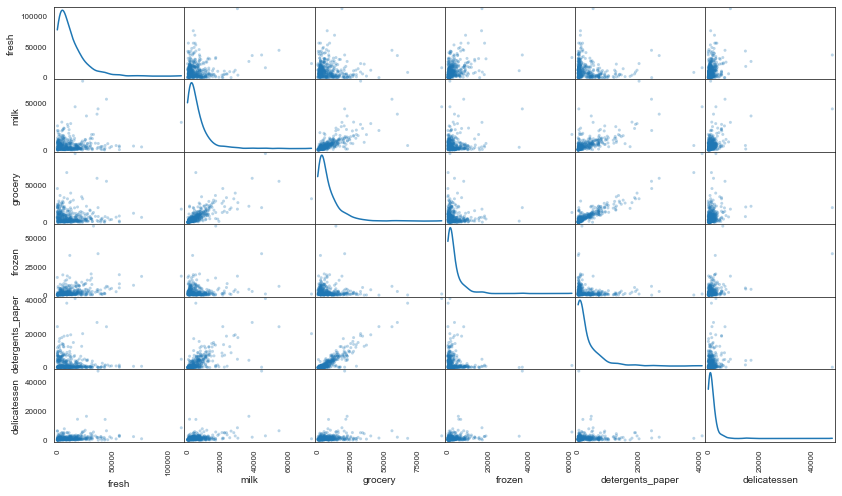

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

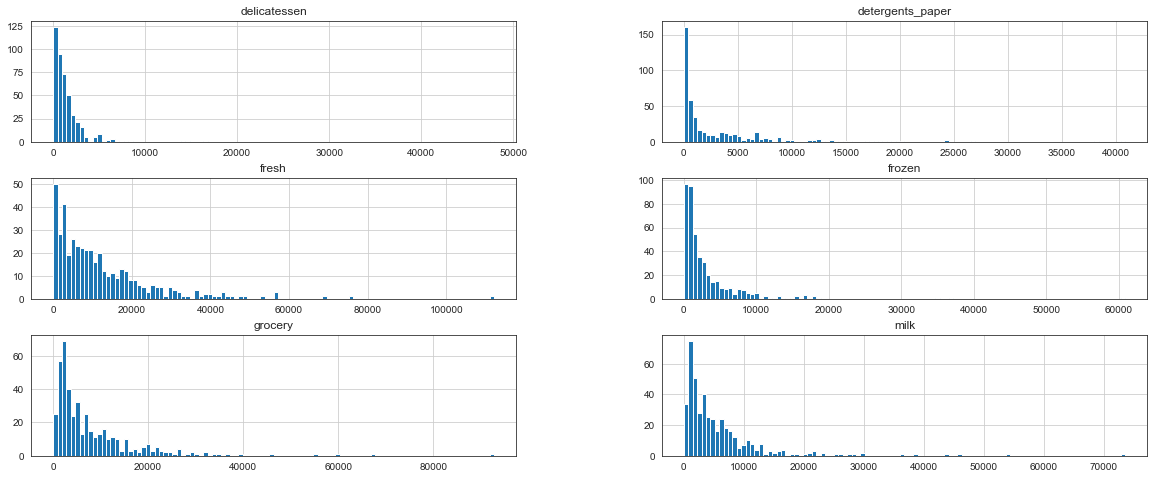

In [9]:
data.hist(figsize = (20, 8), bins = 100);

In [10]:
def hist_quantile(data, q, bins=50):
    """
    Plot the histogram of data instances till the quantile specified by q
    for all columns
    """
    fig, ax = plt.subplots(3, 2, figsize = (10, 12))
    for i in range(len(data.columns)):
        column = data.columns[i]
        ax[i%3][i%2].hist(data[data[column] <= data[column].quantile(q)][column], bins = bins)
        ax[i%3][i%2].set_title(column)

    

In [11]:
hist_quantile(data, .90, 30)

In [12]:
plt.figure(figsize = (8,6))
plt.imshow(data.corr())

plt.colorbar();
plt.xticks(range(6), data.columns.str.extract(r'([^_]*)(_.*)?')[0]);

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
* All features appear to be right skewed with many values concentrated in the regions [0, 2000-5000], hence features distribution isn't normal although it could be manipulated to normalization through log transformation. Outliers regions for features: fresh(over 30000), milk(over 12000), grocery(over 20000), frozen(over 8000), detergents(over 8000), delicatessen(over 4000)
* (grocery, detergents_paper), (milk, grocery), (milk, degergent_papers) and that apparent through the scatterplots and confirmed through the correlation matrix (scatter plot shows the linearity relation visually, hence better for confirmation than mere correlation coefficient)
* confirms
* right skewed distributions with milk and grocery having thick tails and detergents_papers having lighter tail (comparing with their counts as the y-axis count scale isn't the same for every distribution). (Trivial) The reason why all features distribution are right skewed, yet not all of them are correlated because the features aren't distributed among the tuples in the same manner (The histogram sorts every feature individually). For the pairwise scatter plots, the points are scattered almost linearly with some noise around the perfect linear line.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

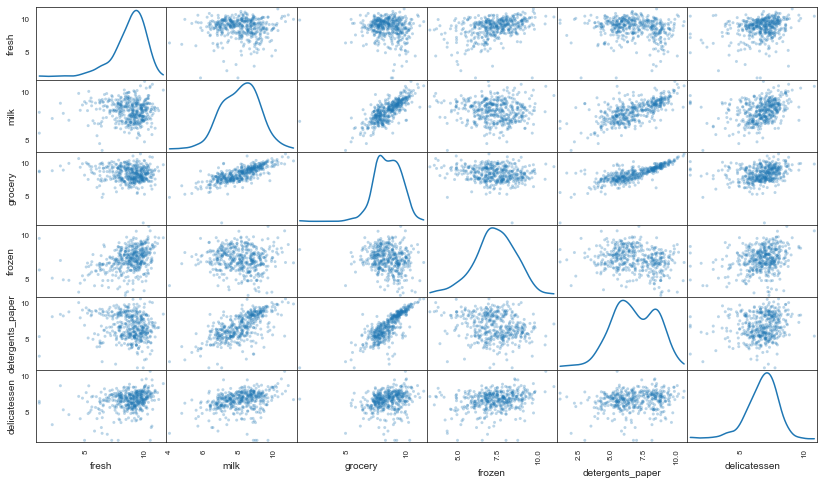

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [14]:
log_data.corr() - data.corr()

fresh      milk   grocery    frozen  detergents_paper  \
fresh             0.000000 -0.120344 -0.120859  0.038115         -0.053918   
milk             -0.120344  0.000000  0.030516 -0.179310          0.016127   
grocery          -0.120859  0.030516  0.000000 -0.124331         -0.128243   
frozen            0.038115 -0.179310 -0.124331  0.000000         -0.080051   
detergents_paper -0.053918  0.016127 -0.128243 -0.080051          0.000000   
delicatessen      0.010496 -0.068536  0.030231 -0.136229          0.097444   

                  delicatessen  
fresh                 0.010496  
milk                 -0.068536  
grocery               0.030231  
frozen               -0.136229  
detergents_paper      0.097444  
delicatessen          0.000000

>**Note:** Correlations: (detergents_paper, milk), (grocery, milk) became a little stronger, (grocery, detergents_paper) became weaker

In [15]:
# Display the log-transformed sample data
display(log_samples)

fresh       milk   grocery    frozen  detergents_paper  delicatessen
0  11.627601  10.296441  9.806316  9.725855          8.506739      9.053687
1   9.814164   7.143618  9.954276  8.589142          8.336390      9.579971
2   5.298317  10.160530  9.894245  6.478510          9.079434      8.740337

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [16]:
# For each feature find the data points with extreme high or low values
import collections
outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers += list(out_data.index)

    display(out_data)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers = [item for item, count in collections.Counter(outliers).items() if count > 1]
print(outliers)
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'fresh':


fresh       milk    grocery    frozen  detergents_paper  delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'milk':


fresh       milk    grocery    frozen  detergents_paper  delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'grocery':


fresh      milk   grocery    frozen  detergents_paper  delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'frozen':


fresh      milk    grocery     frozen  detergents_paper  delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'detergents_paper':


fresh      milk   grocery    frozen  detergents_paper  delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'delicatessen':


fresh       milk    grocery     frozen  detergents_paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

[65, 66, 128, 154, 75]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
* According to tukey's method, all features have outliers through the analysis.
* Normally yes, because they skew the summary info for main stream data points of the features and sometimes considered noise(in case of non precise data); furthermore some machine learning algorithms are badly affected by outliers (.e.g. linear regression using mse, k-means clustering centers positions get distorted due to outliers); we can also separate them and do separate analysis for outliers in case of many outliers. In case of precisely measured and critical data like medical records, outliers can't be simply removed as they may play important role in detecting diseases.
* Added tuples that countained more than one outlier in their features because tuples with more than one outlier are more likely to distort the data (.e.g. when measuring the distance between the center of k-means clustering centers and the other points in order to reposition the centers, those tuples will affect the measurement drastically in more than one feature). The maxiumum values of every feature tuples could be removed, too, but after log transformation the gap between data points decreased, hence there is no need to remove those tupled.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

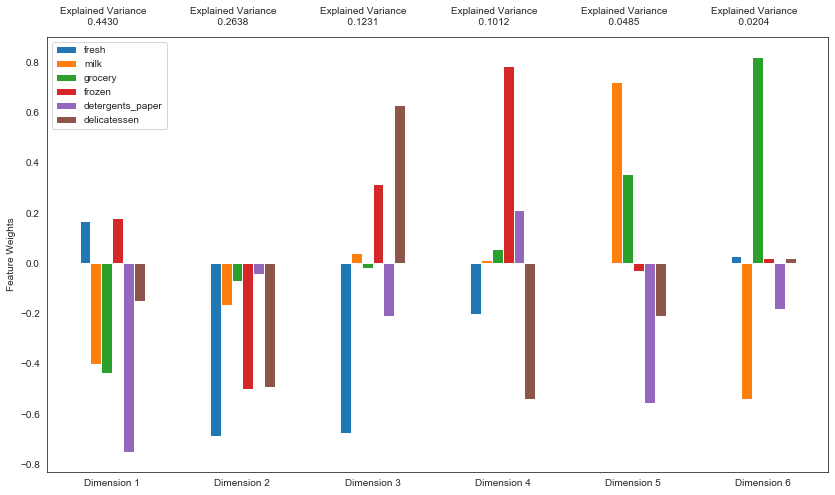

In [17]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA().fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [18]:
print(
    '\nFirst & Second components EV: ', round(pca.explained_variance_ratio_[:2].sum() * 100, 2), '%\n',
    '\nFirst four components EV: ', round(pca.explained_variance_ratio_[:4].sum() * 100, 2), '%\n',
)


First & Second components EV:  70.68 %
 
First four components EV:  93.11 %



In [19]:
for i in range(len(pca.components_)):
    word = "PCA_" + str(i) + " = " 
    for j in range(len(data.columns)):
        word += "(" + str(round(pca.components_[i][j], 2)) + ")" + " * **" + data.columns[i] + "** + "
    
    print(word[:-2])

PCA_0 = (0.17) * **fresh** + (-0.4) * **fresh** + (-0.44) * **fresh** + (0.18) * **fresh** + (-0.75) * **fresh** + (-0.15) * **fresh** 
PCA_1 = (-0.69) * **milk** + (-0.17) * **milk** + (-0.07) * **milk** + (-0.5) * **milk** + (-0.04) * **milk** + (-0.49) * **milk** 
PCA_2 = (-0.68) * **grocery** + (0.04) * **grocery** + (-0.02) * **grocery** + (0.32) * **grocery** + (-0.21) * **grocery** + (0.63) * **grocery** 
PCA_3 = (-0.2) * **frozen** + (0.01) * **frozen** + (0.06) * **frozen** + (0.79) * **frozen** + (0.21) * **frozen** + (-0.54) * **frozen** 
PCA_4 = (-0.0) * **detergents_paper** + (0.72) * **detergents_paper** + (0.36) * **detergents_paper** + (-0.03) * **detergents_paper** + (-0.56) * **detergents_paper** + (-0.21) * **detergents_paper** 
PCA_5 = (0.03) * **delicatessen** + (-0.54) * **delicatessen** + (0.82) * **delicatessen** + (0.02) * **delicatessen** + (-0.18) * **delicatessen** + (0.02) * **delicatessen** 


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
* about 70.68% of the total variance of the data.
* about 93.11% of the total variance of the data.
* Dimensions: 
    * D1: PCA_1 = (0.17) * **fresh** + (-0.4) * **milk** + (-0.44) * **grocery** + (0.18) * **frozen** + (-0.75) * **detergents_paper** + (-0.15) * **delicatessen** <br>  Around **44.3%** of the variance are explained by the first PCA. PCA 1 best represents variance in milk, grocery and detergents_paper due to their high weights (so small changes in those features values have higher mpact on dimension 1 value than fresh and frozen in a negative way "opposite direction to fresh and frozen due to their negative weights" and higher than deli in the same direction.
     <br><br>
    * D2: PCA_2 = (-0.69) * **fresh** + (-0.17) * **milk** + (-0.07) * **grocery** + (-0.5) * **frozen** + (-0.04) * **detergents_paper** + (-0.49) * **delicatessen** <br>   Around **26.38%** of the variance are explained by the second PCA. PCA 2 best represents variance in fresh, frozen and deli due to their high weights. All features in dimension 2 contribute to inversely proportional to dimension 1 value due to the negative weights.
    <br><br>
    * D3: PCA_3 = (-0.68) * **fresh** + (0.04) * **milk** + (-0.02) * **grocery** + (0.32) * **frozen** + (-0.21) * **detergents_paper** + (0.63) * **delicatessen** <br>   Around **12.31%** of the variance are explained by the third PCA. The most dominant features to the value of dimension 3 are fresh (negatively), frozen (positively), deli(positively). From the weigths values, fresh and deli have opposite effect on dimension 3 valua that they almost cancel each other (due to the proximity of their waites absolute value .68 and .63). 
    <br><br>
    * D4: PCA_4 = (-0.2) * **fresh** + (0.01) * **milk** + (0.06) * **grocery** + (0.79) * **frozen** + (0.21) * **detergents_paper** + (-0.54) * **delicatessen** <br>   Around **10.12%** of the variance are explained by the fourth PCA. Domainant features are frozen(positively) and deli (negatively). 
    <br><br>
    * D5: PCA_5 = (-0.0) * **fresh** + (0.72) * **milk** + (0.36) * **grocery** + (-0.03) * **frozen** + (-0.56) * **detergents_paper** + (-0.21) * **delicatessen** <br>  Around **4.85%** of the variance are explained by the fifth PCA. Of the 4.85% explained variance by PCA 5, PCA 5 best explain features milk, grocery and detergetns_paper, fresh feature isn't explained by PCA 5 at all, it doesn't contribute any value at dimension 5 value
    <br><br>
    * D6: PCA_6 = (0.03) * **fresh** + (-0.54) * **milk** + (0.82) * **grocery** + (0.02) * **frozen** + (-0.18) * **detergents_paper** + (0.02) * **delicatessen** <br>   Around **2.04%** of the variance are explained by the sixth PCA. PCA 6 best explains some of the variance of features milk and grocery.
    * In summary, what the first four dimensions best represent in terms of customer spending:
        * Dimsion 1: milk, grocery, detergent_papers.
        * Dimension 2: fresh, frozen, deli.
        * Dimension 3: fresh, frozen, detergents_paper and deli.
        * Dimension 4: frozen and deli.
> **Note:**
* Between parenthesis are the weights assigned to each feature to construct the principal component.
* The weigts of every feature within each dimension at explaining the feature variance is proportional to the percentage or explained variance by the whole dimension. For example, Altough the absolute value of the weight explained by PCA 1 for fresh is .17, relatively low compared to the aboslute value of weight of fresh of PCA 3 (about .68), the PCA 1 explaines .443 of the variances hence, its contribution to explain variance of feature fresh is proportional to .443 * .17 (.07531) while PCA 3 contribution is proportional to .1231 * .68 (.083708)


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -2.1899      -4.8605       0.0008       0.4827       0.5041   
1      -1.4462      -2.7836       1.1083      -0.3929      -1.6836   
2      -4.1959       1.2535       2.9398      -0.4817       0.3075   

   Dimension 6  
0      -0.1988  
1       1.5910  
2      -0.4151

After transofrmation, the dimension values contian negative and very low magnitude values which change the way to interpret values according to the original features. The reason for this change is that the new dimensions are translated rotation of the original dimensions along the highest variance.

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [21]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [22]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -2.1899      -4.8605
1      -1.4462      -2.7836
2      -4.1959       1.2535

In [23]:
reduced_data.describe()

Dimension 1   Dimension 2
count  4.350000e+02  4.350000e+02
mean  -1.045396e-15  7.391278e-16
std    2.132801e+00  1.645762e+00
min   -5.331570e+00 -5.284205e+00
25%   -1.818338e+00 -9.937369e-01
50%    2.058524e-01 -7.910107e-02
75%    1.605064e+00  8.664239e-01
max    6.502507e+00  6.008023e+00

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

In [24]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer:**
* detergents_paper, grocery and milk seem highly correlated with PCA 1.
* delicatessen, frozen and fresh are more correlated with PCA 2.
* Yes, the weights of highly correlated features is high compared to other features in each of the principal components formulas (weights of corresponding features manifested by the long bars in the graph)

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
* k-means excels at separating groups that differ greatly in feature values (occupies separate almost detached regions in the feature space).
* Gausssian Mixture Models excels at separating overlapping groups of data, so even if some groups have similar or same values for specific features that their spaces overlap, yet they are different groups, gaussian mixture models give a way to separate them (soft-clustering). In addition, GMM provides flexibility for the clusters shapes (not necessarily a sphere).
>The number of clusters need to be tuned for both approaches
* After applying principal components analysis, the variations among the featured lessened, hence the probability of overlapping data points from different groups increases. Such behaviour is clear on the two PCA scatter plot, many overlapping points and acording to k-means, the scatter plot appears as just one cluster even though we know a priorie that there are mutliple types of customers (establishments). Hence, I think GMM will be better for our data.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [25]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

for i in range(2, 25):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=i, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print(str(i) + ' clusters: ' + str(round(score, 3)))

2 clusters: 0.422
3 clusters: 0.374
4 clusters: 0.329
5 clusters: 0.306
6 clusters: 0.225
7 clusters: 0.274
8 clusters: 0.344
9 clusters: 0.334
10 clusters: 0.341
11 clusters: 0.32
12 clusters: 0.322
13 clusters: 0.315
14 clusters: 0.341
15 clusters: 0.356
16 clusters: 0.324
17 clusters: 0.312
18 clusters: 0.306
19 clusters: 0.317
20 clusters: 0.32
21 clusters: 0.278
22 clusters: 0.271
23 clusters: 0.276
24 clusters: 0.294


In [26]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=2, random_state=0).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
score

0.42191684646261485

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
* No. Clusters: 
    * 2: .422
    * 3: .374
    * 8: .344
    * 10: .341
    * 15: .356
* 2 clusters of .422 score although I can't think that there just two types of customers (establishments), but the clusters here may refer to another meaning or entity, so I follow along.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

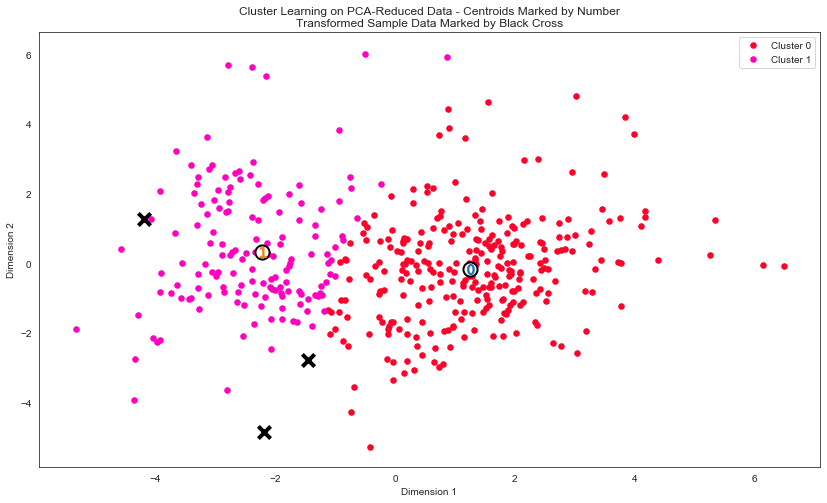

In [27]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [28]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

fresh    milk  grocery  frozen  detergents_paper  delicatessen
Segment 0  8953.0  2114.0   2765.0  2075.0             353.0         732.0
Segment 1  3552.0  7837.0  12219.0   870.0            4696.0         962.0

In [29]:
true_centers - data.mean()

fresh         milk      grocery       frozen  \
Segment 0 -3047.297727 -3682.265909 -5186.277273  -996.931818   
Segment 1 -8448.297727  2040.734091  4267.722727 -2201.931818   

           detergents_paper  delicatessen  
Segment 0      -2528.493182   -792.870455  
Segment 1       1814.506818   -562.870455

In [30]:
true_centers - data.median()

fresh    milk  grocery  frozen  detergents_paper  delicatessen
Segment 0   449.0 -1513.0  -1990.5   549.0            -463.5        -233.5
Segment 1 -4952.0  4210.0   7463.5  -656.0            3879.5          -3.5

In [31]:
true_centers - data.quantile(.25)

fresh    milk  grocery   frozen  detergents_paper  delicatessen
Segment 0  5825.25   581.0    612.0  1332.75             96.25        323.75
Segment 1   424.25  6304.0  10066.0   127.75           4439.25        553.75

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
* Segment 0: could be small market, small restaurant as segment 0 purchases costs are less than the average for all categories, but its purchase from fresh foods is higher than the median.
* Segment 1: could be cafe, grocery store, supermaret, wholesale retailer as segment 1 purchases of milk, grocery and detergents_paper is above average, but its purchases of fresh and frozen is much below the average.
> Comparison between the mean values of the categories and segments are made by subtracting the first from the segment centers in the above cells.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**
* Comparing assigned establishment to samples from Q1 and assigned establishments to the segments from Q8:
    * Sample 1: Segment 1. (as both could be wholesale retailer or a supermarket)
    * Sample 2: Segment 0. (as both could be restaurant in addition both manifest high purchase of fresh foods) 
    * Sample 3: Segment 1. (both could be cafe or wholesale retailer)
* All belongs to segment 1.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
* We can't assume the change will affect all customers withing a segment equally, but we can take samples points from each customer segment region and change the delivery service for those samples from 5 days a week to 3 days a week. Based on the samples updated purchases from each samples of the respective segments, we'll make hypothesis testing on the spending change on each category separately and then combine their effects to determine whether the whole segment reacts positively or negatively to the new delivery method based on the dominant effect on the sample points. Based on the previous, we can tell whether customers of segment 0 or 1 are likely to react positively or negatively to the new delivery method or whether the customers react independently of the segments they belong to. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
* By training the data with the the customer segment number as the target variable. New data points (new customers) can be predicted by the pretrained algorithm on the original data.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

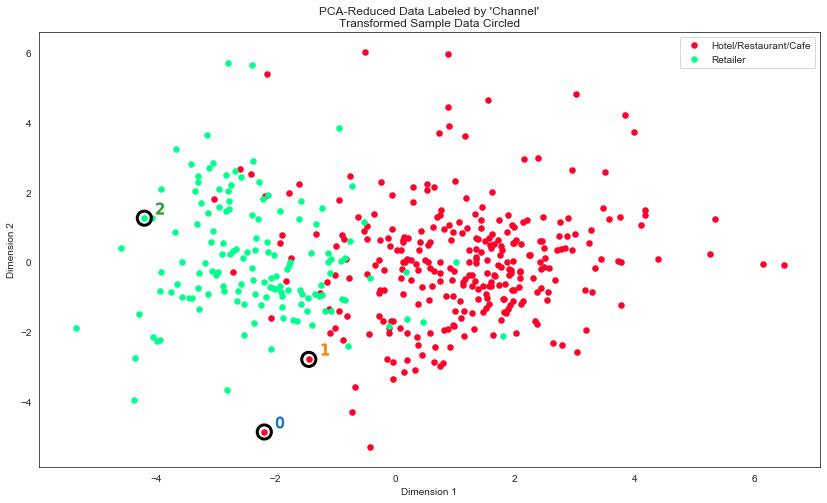

In [33]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
* Actually, GMM does pretty good job at clustering the data to resemble the channel feature.
* No, since the customer segments don't overlap at all while the 'Retailers'/ 'Hotels/Restaurants/Cafes' channel overlap at some points (some green points amid red regions and vice versa)
* To great extent yes, precisely no as I considered cafe belonged to segment 1 for high purchases of milk and grocery, but in reality it belonged to customer 1, but since there some overlapping of data points between the Channel feature regions, this possibility of cafe being in segment 1 could be and that why 'too great extent'

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.